# CSCI-250: Project 3 - Lucy Buhayenko

# Part 1

# Importing Libraries

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Spotify Dataset

In [476]:
df = pd.read_csv('spotify_churn_dataset.csv')
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


# Looking at columns 

In [477]:
df.columns

Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

# Delete User_id column because it's not useful

In [478]:
df = df.drop(columns=['user_id'])

# Cheking for missing values

In [479]:
df.isnull().sum()


gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

# There are no missing values, so I don't replace or delete anything

# I encode the dataset to make seperate columns for features

In [480]:
df_encoded = pd.get_dummies(df, drop_first=True)

# I define X, y and X_encoded

In [481]:
y = df['is_churned']
X = df.drop(columns=['is_churned'])
X_encoded = pd.get_dummies(X, drop_first=True)


# There are no missing values in encoded dataset

In [482]:
df_encoded.isnull().sum()

age                          0
listening_time               0
songs_played_per_day         0
skip_rate                    0
ads_listened_per_week        0
offline_listening            0
is_churned                   0
gender_Male                  0
gender_Other                 0
country_CA                   0
country_DE                   0
country_FR                   0
country_IN                   0
country_PK                   0
country_UK                   0
country_US                   0
subscription_type_Free       0
subscription_type_Premium    0
subscription_type_Student    0
device_type_Mobile           0
device_type_Web              0
dtype: int64

# Correlation

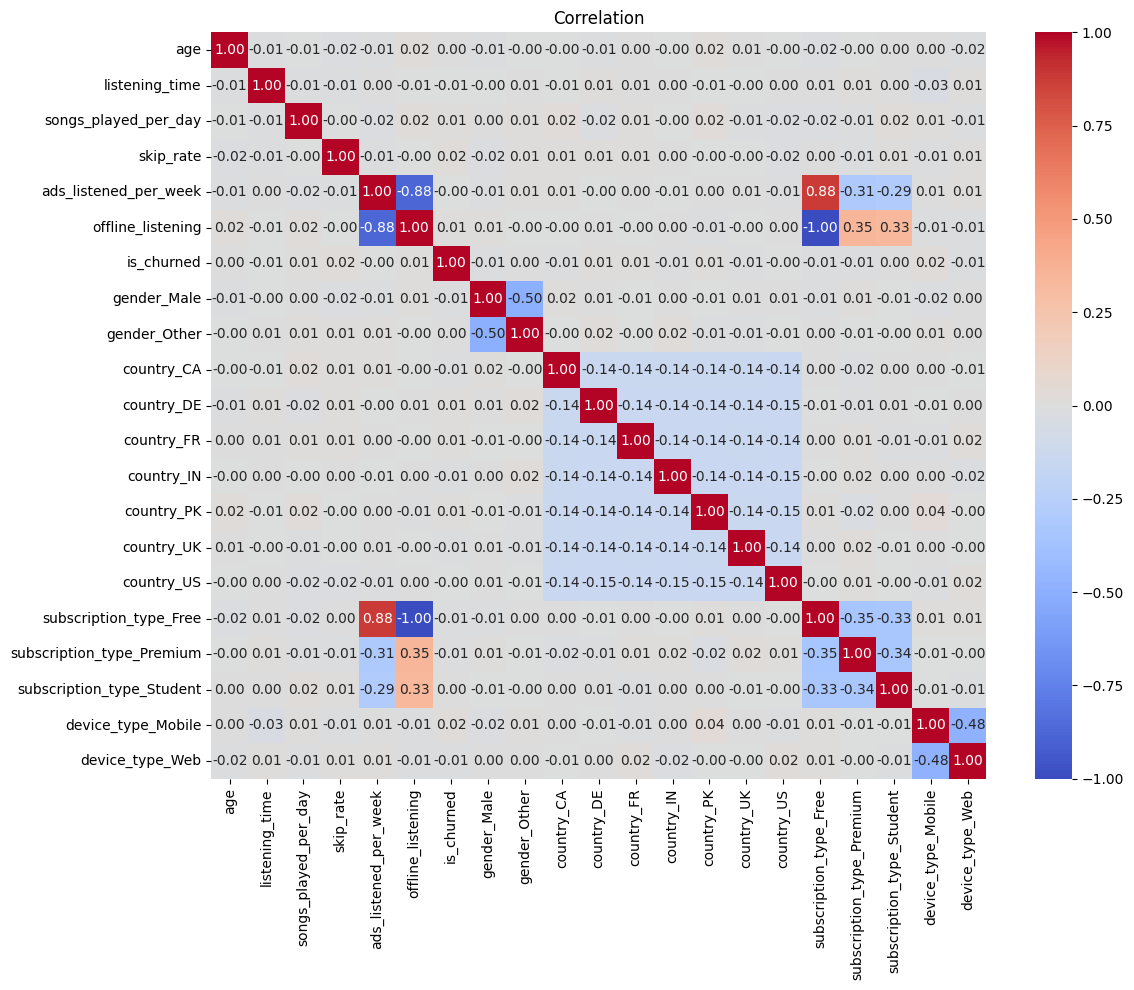

In [483]:
# Plot correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation")
plt.tight_layout()
plt.show()

### Subsciption type free is highly negatively correlated(-1.00) with ads listened per week so I delete subscription type free. Also, I delete the offline listening because it's highly negatively correlated(-0.88) with ads listened per week. I drop device type Mobile because it's negatively correlated(-0.48) with device type Web. There is gender Male correlattion of 50% with gender Other but i'll not delete it because the other 50 percent is Female.

In [484]:
df_encoded = df_encoded.drop(columns=['subscription_type_Free', 'device_type_Mobile', 'offline_listening'])
df_encoded.columns

Index(['age', 'listening_time', 'songs_played_per_day', 'skip_rate',
       'ads_listened_per_week', 'is_churned', 'gender_Male', 'gender_Other',
       'country_CA', 'country_DE', 'country_FR', 'country_IN', 'country_PK',
       'country_UK', 'country_US', 'subscription_type_Premium',
       'subscription_type_Student', 'device_type_Web'],
      dtype='object')

### Plot showing how different features relate to each other, colored by whether a user churned or not. It helps visualize patterns in the data based on churn status. The target variable is is_churned.

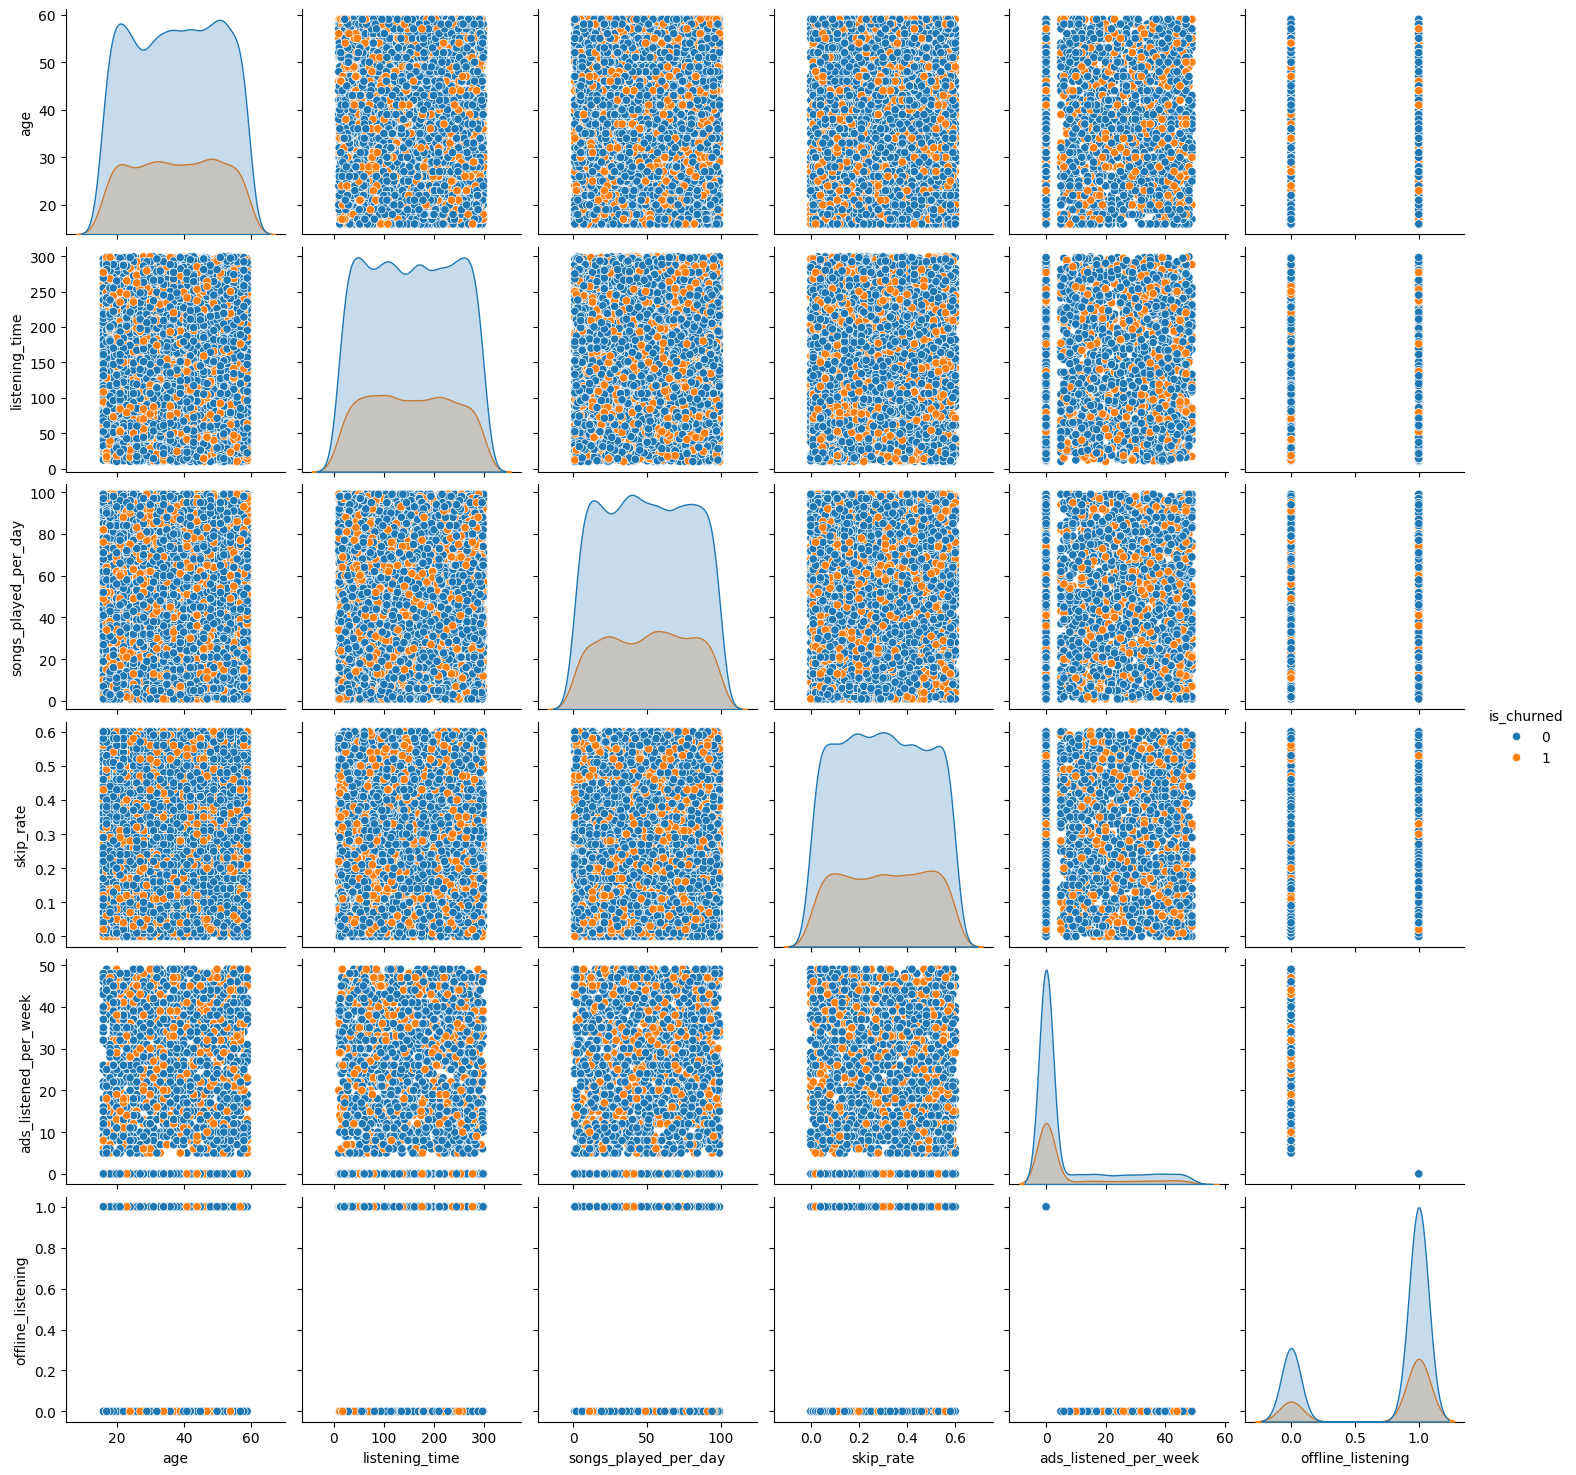

In [485]:
# Combine X and y into one DataFrame
combined_data = pd.concat([X, y], axis=1)

# Pairplot with hue on the target column name 'is_churned'
sns.pairplot(combined_data, hue='is_churned')

plt.show()

# Confusion Matrix

In [1]:
'''
from sklearn.metrics import confusion_matrix

cf_matrix1 = confusion_matrix(y_test, y_pred)
cf_matrix2 = confusion_matrix(y_test, y_pred, normalize='true')
cf_matrix3 = confusion_matrix(y_test, y_pred, normalize ='pred')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title('Confusion Matrix')
sns.heatmap(cf_matrix1, annot=True, cbar=False, ax=axes[0])


axes[1].set_title('Recall')
sns.heatmap(cf_matrix2, annot=True, cbar=False, ax=axes[1])


axes[2].set_title('Precision')
sns.heatmap(cf_matrix3, annot=True, cbar=False, ax=axes[2])
'''


"\nfrom sklearn.metrics import confusion_matrix\n\ncf_matrix1 = confusion_matrix(y_test, y_pred)\ncf_matrix2 = confusion_matrix(y_test, y_pred, normalize='true')\ncf_matrix3 = confusion_matrix(y_test, y_pred, normalize ='pred')\n\nfig, axes = plt.subplots(1, 3, figsize=(15, 5))\n\naxes[0].set_title('Confusion Matrix')\nsns.heatmap(cf_matrix1, annot=True, cbar=False, ax=axes[0])\n\n\naxes[1].set_title('Recall')\nsns.heatmap(cf_matrix2, annot=True, cbar=False, ax=axes[1])\n\n\naxes[2].set_title('Precision')\nsns.heatmap(cf_matrix3, annot=True, cbar=False, ax=axes[2])\n"

# Scaler

### I scale, fit and transform the scaled features for training data


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


# Logistic Regression

### I create logistic regression model. Then i do cross validation and find the scores and print them. The mean cross-validation accuracy is: 0.74113

In [ ]:
log_reg = LogisticRegression()

cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.5f}")

Cross-Validation Scores: [0.740625 0.74125  0.74125  0.74125  0.74125 ]
Mean Cross-Validation Accuracy: 0.74113


# Regularized Logistic Regression (L1 and L2) with the best C parameter

### I define the hyperparameters. I iterate over penalties (L1 and L2) and different values of C. Then, I initialize Logistic Regression model with specified penalty and C. Then, I do 5-fold cross-validation and calculate the mean of those 5 folds. So, the results are: Mean Cross-Validation Accuracy is 0.74113. The accuracy stayed the same (0.74113) no matter what values were used for the C or penalty type (L1 or L2). This means regularization doesn't seem to improve the model for this dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1, 10, 100]

for penalty in penalties:
    for C in C_values:
        model = LogisticRegression(penalty=penalty, C=C, solver='liblinear')

        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

        mean_accuracy = np.mean(cv_scores)

        print(f"Penalty: {penalty}, C: {C}, Mean Cross-Validation Accuracy: {mean_accuracy:.5f}")

Penalty: l1, C: 0.01, Mean Cross-Validation Accuracy: 0.74113
Penalty: l1, C: 0.1, Mean Cross-Validation Accuracy: 0.74113
Penalty: l1, C: 1, Mean Cross-Validation Accuracy: 0.74113
Penalty: l1, C: 10, Mean Cross-Validation Accuracy: 0.74113
Penalty: l1, C: 100, Mean Cross-Validation Accuracy: 0.74113
Penalty: l2, C: 0.01, Mean Cross-Validation Accuracy: 0.74113
Penalty: l2, C: 0.1, Mean Cross-Validation Accuracy: 0.74113
Penalty: l2, C: 1, Mean Cross-Validation Accuracy: 0.74113
Penalty: l2, C: 10, Mean Cross-Validation Accuracy: 0.74113
Penalty: l2, C: 100, Mean Cross-Validation Accuracy: 0.74113


In [ ]:
poly = PolynomialFeatures(degree=2)
X_quad = poly.fit_transform(X_scaled)  # X_scaled is your feature matrix (already standardized)

#Logistic Regression model
log_reg_quad = LogisticRegression()

#cross-validation (5) on quadratic features
cv_scores = cross_val_score(log_reg_quad, X_quad, y, cv=5, scoring='accuracy')

#Calculate the mean accuracy across the 5
mean_accuracy = np.mean(cv_scores)

# Print the result
print(f"Quadratic Logistic Regression Mean Cross-Validation Accuracy: {mean_accuracy:.5f}")


Quadratic Logistic Regression Mean Cross-Validation Accuracy: 0.73950


### The mean of cross-validation accuracy of the quadratic logistic regression is 0.73950

# Best Model

## The results show that the accuracy of logistic regression and regularized logistic regression(L1 and L2) all are 0.73125. The accuracy of quadratic logistic regression is 0.7300. Therefore, the best model is: Regularized Logistic Regression () because 
Regularized logistic regression (L1 and L2) is better than simple logistic regression because it combats overfitting by penalizing model complexity. The choice between L1 (Lasso) and L2 (Ridge) depends on your goal: use L1 for feature selection when you have many irrelevant features, and use L2 when you want to shrink coefficients of correlated features without eliminating them. Simple logistic regression is prone to overfitting and is best for small datasets with few features. 


# Part 2

## Graphing target to see if the dataset is imbalanced: The data is imbalanecd. The bar graph shows that there are 5929 people who have not churned (didn't cancel subsription - 0), and 2071 people who have churned(did cancel subscription - 1). The dataset is imbalanced because there are much more people who have churned then didn't. 

Class distribution for is_churned: is_churned
0    5929
1    2071
Name: count, dtype: int64


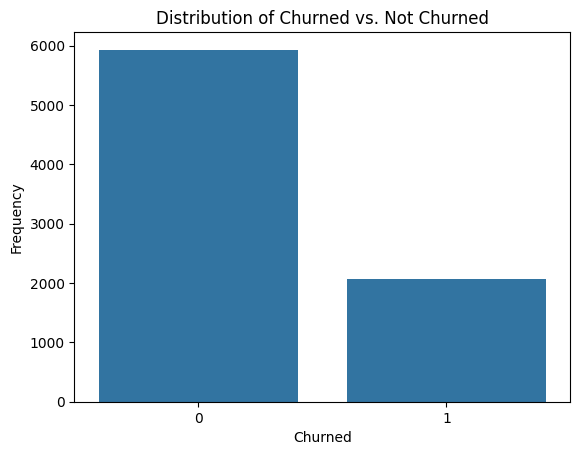

In [ ]:
# Check the class distribution for the target variable 'is_churned'
churn_distribution = df['is_churned'].value_counts()
print("Class distribution for is_churned:", churn_distribution)

#graph bar plot
sns.countplot(x='is_churned', data=df)
plt.title('Distribution of Churned vs. Not Churned')
plt.xlabel('Churned')
plt.ylabel('Frequency')
plt.show()

# Not churned is 74.84 % and is churned is 25.16%

In [ ]:
# Define features and label
features = df_encoded.columns.drop('is_churned')
label = 'is_churned'

# Extract features and target
X = df_encoded[features].to_numpy()
y = df_encoded[label].to_numpy()

# Split data into train + test
X_trainF, X_test, y_trainF, y_test = train_test_split(X, y, test_size=0.20)

# Scale features
scaler = StandardScaler()
X_trainF = scaler.fit_transform(X_trainF)
X_test = scaler.transform(X_test)

# Further split train into train + validation
X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF, test_size=0.20)

# Count class distribution in training set
N0 = len(y_train[y_train == 0])
N1 = len(y_train[y_train == 1])

print('Percentage of 0 (Not churned): %.2f%%' % (N0 / (N0 + N1) * 100))
print('Percentage of 1 (Churned): %.2f%%' % (N1 / (N0 + N1) * 100))

Percentage of 0 (Not churned): 74.84%
Percentage of 1 (Churned): 25.16%


# Over Sampling

In [ ]:
toadd = N0-N1
index = np.where(y_train==1)[0]
rd = np.random.choice(index, toadd)
X_train2 = np.vstack((X_train, X_train[rd]))
y_train2 = np.hstack((y_train, y_train[rd]))

N0=len(y_train2[y_train2==0])
N1=len(y_train2[y_train2==1])
print('Percentage of 0 is %.2f' % ( N0/(N0+N1)*100 ))
print('Percentage of 1 is %.2f' % ( N1/(N0+N1)*100 ))

Percentage of 0 is 50.00
Percentage of 1 is 50.00


In [ ]:
log = LogisticRegression()
log.fit(X_train2, y_train2) 
y_pred = log.predict(X_val)
f1_score(y_val, y_pred)

0.36149732620320857

# Under Sampling

In [ ]:
ones_indices = np.where(y_train == 1)[0]
zeros_indices = np.where(y_train == 0)[0]

selected_ones = np.random.choice(ones_indices, N0, replace=True)

undersampled_indices = np.concatenate([zeros_indices, selected_ones])
np.random.shuffle(undersampled_indices)

X_train_under = X_train[undersampled_indices]
y_train_under = y_train[undersampled_indices]

log = LogisticRegression()
log.fit(X_train_under, y_train_under) 
y_pred = log.predict(X_val)
f1_score(y_val, y_pred)

0.33836206896551724

# SMOTE

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
unique, counts = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(3832), np.int64(1): np.int64(3832)}


In [ ]:
log = LogisticRegression()
log.fit(X_train_smote, y_train_smote)
y_pred = log.predict(X_val)
f1_score(y_val, y_pred)

0.34854771784232363

# Class Weight

In [487]:
N0=len(y_train[y_train==0])
N1=len(y_train[y_train==1])

from sklearn.utils.class_weight import compute_class_weight

cw =  compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
cw = {0: cw[0], 1: cw[1]}

X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF, test_size=0.20)


log = LogisticRegression(class_weight=cw)
log.fit(X_train, y_train)
y_pred = log.predict(X_val)
f1_score(y_val, y_pred)

0.37534498620055196